<a href="https://colab.research.google.com/github/ihagoSantos/statistical_models/blob/main/logistic_regression_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Logística Binária

In [50]:
import numpy as np
import pandas as pd
import warnings

# Suprimir os warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [51]:
doenca_pre = pd.read_csv('covid_doencas_preexistentes.csv', sep=';', encoding='utf-8')

# Análise Inicial
Verificando as variáveis carregadas no banco de dados \
Bases de dados tras a informação de pessoas que receberam o diagnóstico de COVID
perfil do paciente e doenças pré existentes.

In [52]:
doenca_pre.head()

nome_munic  codigo_ibge  idade   cs_sexo diagnostico_covid19  \
0             Carapicuíba      3510609   36.0  FEMININO          CONFIRMADO   
1                 Jacareí      3524402   54.0  FEMININO          CONFIRMADO   
2  Vargem Grande Paulista      3556453   33.0  FEMININO          CONFIRMADO   
3                Paulínia      3536505   47.0  FEMININO          CONFIRMADO   
4             Santo André      3547809   41.0  FEMININO          CONFIRMADO   

  data_inicio_sintomas  obito      asma cardiopatia  diabetes  \
0           2020-07-10      0  IGNORADO    IGNORADO  IGNORADO   
1           2020-07-09      0  IGNORADO    IGNORADO  IGNORADO   
2           2020-07-10      0  IGNORADO    IGNORADO  IGNORADO   
3           2021-01-25      0  IGNORADO    IGNORADO  IGNORADO   
4           2021-01-10      0  IGNORADO    IGNORADO  IGNORADO   

  doenca_hematologica doenca_hepatica doenca_neurologica doenca_renal  \
0            IGNORADO        IGNORADO           IGNORADO     IGNORADO   
1            IGNORADO        IGNORADO           IGNORADO     IGNORADO   
2            IGNORADO        IGNORADO           IGNORADO     IGNORADO   
3            IGNORADO        IGNORADO           IGNORADO     IGNORADO   
4            IGNORADO        IGNORADO           IGNORADO     IGNORADO   

  imunodepressao obesidade outros_fatores_de_risco pneumopatia  puerpera  \
0       IGNORADO  IGNORADO                IGNORADO    IGNORADO  IGNORADO   
1       IGNORADO  IGNORADO                IGNORADO    IGNORADO  IGNORADO   
2       IGNORADO  IGNORADO                IGNORADO    IGNORADO  IGNORADO   
3       IGNORADO  IGNORADO                IGNORADO    IGNORADO  IGNORADO   
4       IGNORADO  IGNORADO                IGNORADO    IGNORADO  IGNORADO   

  sindrome_de_down  
0         IGNORADO  
1         IGNORADO  
2         IGNORADO  
3         IGNORADO  
4         IGNORADO

In [53]:
doenca_pre.shape

(413343, 20)

## 1° Análise: Verificar se existe uma tendência de óbito entre pessoas do sexo feminino e masculino

In [54]:
from collections import Counter

Fazer contagem por categoria das variáveis

In [55]:
Counter(doenca_pre.cs_sexo)

Counter({'FEMININO': 219686,
         'MASCULINO': 192572,
         'INDEFINIDO': 1077,
         'IGNORADO': 8})

In [56]:
doenca_pre['cs_sexo'].value_counts()

cs_sexo
FEMININO      219686
MASCULINO     192572
INDEFINIDO      1077
IGNORADO           8
Name: count, dtype: int64

Como queremos compararo gÊnero feminino e masculino, iremos desconsiderar as demais classes. \
Valores Missing (NAN)

In [57]:
doenca_pre.isnull().sum()

nome_munic                    0
codigo_ibge                   0
idade                       557
cs_sexo                       0
diagnostico_covid19           0
data_inicio_sintomas       6794
obito                         0
asma                          0
cardiopatia                   0
diabetes                      0
doenca_hematologica           0
doenca_hepatica               0
doenca_neurologica            0
doenca_renal                  1
imunodepressao                1
obesidade                     1
outros_fatores_de_risco       1
pneumopatia                   1
puerpera                      1
sindrome_de_down              1
dtype: int64

Excluir valor NAN de cs_sexo

In [58]:
# Exemplo de exclusão de valores NAN
doenca_pre.dropna(subset=['cs_sexo'], inplace=True)

Excluir IGNORADO

In [59]:
relacao = doenca_pre.loc[doenca_pre.cs_sexo != 'IGNORADO']

Excluir INDEFINIDO

In [60]:
relacao = relacao.loc[relacao.cs_sexo != 'INDEFINIDO']

Verificando as variáveis que ficaram na base de dados

In [61]:
relacao['cs_sexo'].value_counts()

cs_sexo
FEMININO     219686
MASCULINO    192572
Name: count, dtype: int64

In [62]:
import plotly.express as px
px.pie(relacao, names='cs_sexo')

### Analisando a quantidade de óbitos

In [63]:
relacao.obito.value_counts()

obito
0    399411
1     12847
Name: count, dtype: int64

In [64]:
px.pie(relacao,names='obito')

### Análise da classificação dos atributos
Verificando como o Python reconheceu as variáveis

In [65]:
relacao.dtypes

nome_munic                  object
codigo_ibge                  int64
idade                      float64
cs_sexo                     object
diagnostico_covid19         object
data_inicio_sintomas        object
obito                        int64
asma                        object
cardiopatia                 object
diabetes                    object
doenca_hematologica         object
doenca_hepatica             object
doenca_neurologica          object
doenca_renal                object
imunodepressao              object
obesidade                   object
outros_fatores_de_risco     object
pneumopatia                 object
puerpera                    object
sindrome_de_down            object
dtype: object

### Renomeando (Sobrescrevendo) a variável obito

In [66]:
relacao['obito'] = relacao['obito'].replace({0: 'nao', 1: 'sim'})

In [67]:
relacao.head()

nome_munic  codigo_ibge  idade   cs_sexo diagnostico_covid19  \
0             Carapicuíba      3510609   36.0  FEMININO          CONFIRMADO   
1                 Jacareí      3524402   54.0  FEMININO          CONFIRMADO   
2  Vargem Grande Paulista      3556453   33.0  FEMININO          CONFIRMADO   
3                Paulínia      3536505   47.0  FEMININO          CONFIRMADO   
4             Santo André      3547809   41.0  FEMININO          CONFIRMADO   

  data_inicio_sintomas obito      asma cardiopatia  diabetes  \
0           2020-07-10   nao  IGNORADO    IGNORADO  IGNORADO   
1           2020-07-09   nao  IGNORADO    IGNORADO  IGNORADO   
2           2020-07-10   nao  IGNORADO    IGNORADO  IGNORADO   
3           2021-01-25   nao  IGNORADO    IGNORADO  IGNORADO   
4           2021-01-10   nao  IGNORADO    IGNORADO  IGNORADO   

  doenca_hematologica doenca_hepatica doenca_neurologica doenca_renal  \
0            IGNORADO        IGNORADO           IGNORADO     IGNORADO   
1            IGNORADO        IGNORADO           IGNORADO     IGNORADO   
2            IGNORADO        IGNORADO           IGNORADO     IGNORADO   
3            IGNORADO        IGNORADO           IGNORADO     IGNORADO   
4            IGNORADO        IGNORADO           IGNORADO     IGNORADO   

  imunodepressao obesidade outros_fatores_de_risco pneumopatia  puerpera  \
0       IGNORADO  IGNORADO                IGNORADO    IGNORADO  IGNORADO   
1       IGNORADO  IGNORADO                IGNORADO    IGNORADO  IGNORADO   
2       IGNORADO  IGNORADO                IGNORADO    IGNORADO  IGNORADO   
3       IGNORADO  IGNORADO                IGNORADO    IGNORADO  IGNORADO   
4       IGNORADO  IGNORADO                IGNORADO    IGNORADO  IGNORADO   

  sindrome_de_down  
0         IGNORADO  
1         IGNORADO  
2         IGNORADO  
3         IGNORADO  
4         IGNORADO

In [68]:
relacao.dtypes

nome_munic                  object
codigo_ibge                  int64
idade                      float64
cs_sexo                     object
diagnostico_covid19         object
data_inicio_sintomas        object
obito                       object
asma                        object
cardiopatia                 object
diabetes                    object
doenca_hematologica         object
doenca_hepatica             object
doenca_neurologica          object
doenca_renal                object
imunodepressao              object
obesidade                   object
outros_fatores_de_risco     object
pneumopatia                 object
puerpera                    object
sindrome_de_down            object
dtype: object

In [69]:
relacao.obito.value_counts()

obito
nao    399411
sim     12847
Name: count, dtype: int64

### Transformando em variáveis categóricas
Transformando as variáveis que estão como objetos como categorias.

In [70]:
relacao['cs_sexo'] = relacao['cs_sexo'].astype('category')

In [71]:
relacao['obito'] = relacao['obito'].astype('category')

In [72]:
relacao.dtypes

nome_munic                   object
codigo_ibge                   int64
idade                       float64
cs_sexo                    category
diagnostico_covid19          object
data_inicio_sintomas         object
obito                      category
asma                         object
cardiopatia                  object
diabetes                     object
doenca_hematologica          object
doenca_hepatica              object
doenca_neurologica           object
doenca_renal                 object
imunodepressao               object
obesidade                    object
outros_fatores_de_risco      object
pneumopatia                  object
puerpera                     object
sindrome_de_down             object
dtype: object

# Modelo 1: Uma variável independente
Queremos entender se a pessoa que foi diagnosticada como COVID, existe uma relação entre o gênero e o óbito.\
Logo, teremos o primeiros modelo com uma única variável independente. \
## Pressupostos:
- Variável dependente binária (dicotômica) -> Variável resposta (Y) dicotômica: Óbito - Sim ou Não.
- Categorias mutuamente exclusivas - a mesma pessoa não pode estar em duas situações.
- Independência das observações (sem medidas repeditas) -> a mesma pessoa é analisada uma única v

In [73]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

Criação do modelo de Regressão Logística

In [74]:
modelo1 = smf.glm(formula = 'obito ~ cs_sexo', data=relacao, family=sm.families.Binomial()).fit()
print(modelo1.summary())

                      Generalized Linear Model Regression Results                       
Dep. Variable:     ['obito[nao]', 'obito[sim]']   No. Observations:               412258
Model:                                      GLM   Df Residuals:                   412256
Model Family:                          Binomial   Df Model:                            1
Link Function:                            Logit   Scale:                          1.0000
Method:                                    IRLS   Log-Likelihood:                -56772.
Date:                          Thu, 15 Aug 2024   Deviance:                   1.1354e+05
Time:                                  09:20:12   Pearson chi2:                 4.12e+05
No. Iterations:                               7   Pseudo R-squ. (CS):           0.002100
Covariance Type:                      nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
---------------------

# Deviance Residuals
**Hipótese Testada:**
- $H_0:$ O Modelo ajusta bem os dados.
- $H_a:$ O Modelo não ajusta bem os dados
**Condição de Aceitação/Rejeição:**
- A deviance total é comparada com uma distribuição qui-quadrado com $n - p$ graus de liberdade, onde $n$ é o número de observações e $p$ é o número de parâmetros do modelo.
- **Aceitação de $H_0$:** Se o valor $p$ calculado a partir da deviance é maior que $\alpha$, aceitamos $H_0$ e concluímos que o modelo ajusta bem os dados.
- **Rejeição de $H_0$:** Se o valor $p$ é menor que $\alpha$, rejeitamos $H_0$ e concluímos que o modelo não ajusta bem os dados.

In [75]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy.stats import chi2, chisquare
from statsmodels.graphics.regressionplots import abline_plot
import scipy.stats as stats # importando o módulo stats da biblioteca Scipy

In [76]:
# Teste de Deviance para os resíduos
deviance_test_statistic = modelo1.deviance
deviance_df = modelo1.df_resid
deviance_p_value = 1 - stats.chi2.cdf(deviance_test_statistic, deviance_df)

In [78]:
print("Teste de Deviance para os Resíduos:")
print("Estatística de teste:", deviance_test_statistic)
print("Graus de liberdade:", deviance_df)
print("Valor p:", deviance_p_value)

Teste de Deviance para os Resíduos:
Estatística de teste: 113543.29221718937
Graus de liberdade: 412256
Valor p: 1.0


# Testes de Adequação do Modelo
## 1. Pearson Chi-Square Test
**Hipótese Testada:**
- $H_0:$ O Modelo ajusta bem os dados.
- $H_a:$ O Modelo não ajusta bem os dados
**Condição de Aceitação/Rejeição:**
- Calcula-se a estatística do teste qui-quadrado de Pearson, que segue uma distribuição qui-quadrado com $n - p$ graus de liberdade.
- **Aceitação de $H_0$:** Se o valor $p$ é maior que $\alpha$, aceitamos $H_0$ e concluímos que o modelo ajusta bem os dados.
- **Rejeição de $H_0$:** Se o valor $p$ é menor que $\alpha$, rejeitamos $H_0$ e concluímos que o modelo não ajusta bem os dados.

In [79]:
# Obtendo os resíduos de PEarson
residuos_pearson = modelo1.resid_pearson

# Teste de Pearson para os Resíduos
pearson_test_statistic = np.sum(residuos_pearson**2)
pearson_df = len(residuos_pearson) - modelo1.df_model - 1 ## Graus de liberdade corrigidos
pearson_p_value = 1 - stats.chi2.cdf(pearson_test_statistic, pearson_df)

print("\nTeste de Paerson para os Resíduos:")
print("Estatística de teste:", pearson_test_statistic)
print("Graus de liberdade:", pearson_df)
print("Valor p:", pearson_p_value)


Teste de Paerson para os Resíduos:
Estatística de teste: 412257.9999999981
Graus de liberdade: 412256
Valor p: 0.4988284006415912


## 2. Teste de Hosmer-Lemeshow
**Hipótese Testada:**
- $H_0:$ O Modelo ajusta bem os dados (não há diferença significativa entre as frequências observadas e esperadas).
- $H_a:$ O Modelo não ajusta bem os dados (há diferença significativa entre as frequÊncias observadas e esperadas).
**Condição de Aceitação/Rejeição:**
- Calcula-se a estatística do teste Hosmer-Lemeshow, que segue uma distribuição qui-quadrado com $g - 2$ graus de liberdade, onde $g$ é o número de grupos.
- **Aceitação de $H_0$:** Se o valor $p$ é maior que o nível de significância $\alpha$ (geralmente 0.05), aceitamos $H_0$ e concluímos que o modelo ajusta bem os dados.
- **Rejeição de $H_0$:** Se o valor $p$ é menor que $\alpha$, rejeitamos $H_0$ e concluímos que o modelo não ajusta bem os dados.

In [82]:
def hosmer_lemeshow_test(model, g=10):
  data = pd.DataFrame({'observed': model.model.endog, 'predicted': model.fittedvalues})
  data['group'] = pd.qcut(data['predicted'], g, duplicates='drop')
  grouped = data.groupby('group')
  observed = grouped['observed'].sum()
  expected = grouped['predicted'].sum()
  hl_stat = ((observed - expected) ** 2 / (expected * (1 - expected / grouped.size()))).sum()
  hl_p_value = chi2.sf(hl_stat, g - 1)
  return hl_stat, hl_p_value

hl_stat, hl_p_value = hosmer_lemeshow_test(modelo1)
print(f"Hosmer-Lemeshow Test: Stat={hl_stat}, p-value={hl_p_value}")

Hosmer-Lemeshow Test: Stat=2.7221223499845227e-25, p-value=1.0


In [83]:
modelo1.params

Intercept               3.718208
cs_sexo[T.MASCULINO]   -0.531617
dtype: float64

**Observação:** Como vimos, a regressão logística retornará a probabilidade de sucesso (1), logo neste caso estamos analisando a probabilidade de ocorrência do óbito.\
Porém iremos verificar se realmente é isso que ocorre:

In [85]:
modelo_prova = smf.glm(formula='cs_sexo ~ obito', data=relacao, family=sm.families.Binomial()).fit()
print(modelo_prova.summary())

                              Generalized Linear Model Regression Results                              
Dep. Variable:     ['cs_sexo[FEMININO]', 'cs_sexo[MASCULINO]']   No. Observations:               412258
Model:                                                     GLM   Df Residuals:                   412256
Model Family:                                         Binomial   Df Model:                            1
Link Function:                                           Logit   Scale:                          1.0000
Method:                                                   IRLS   Log-Likelihood:            -2.8443e+05
Date:                                         Thu, 15 Aug 2024   Deviance:                   5.6886e+05
Time:                                                 09:51:17   Pearson chi2:                 4.12e+05
No. Iterations:                                              4   Pseudo R-squ. (CS):           0.002100
Covariance Type:                                     nonrobust  

Invertemos a variável dependente com a independente para verificar qual o Python está selecionando no modelo.

In [86]:
print(modelo1.summary())

                      Generalized Linear Model Regression Results                       
Dep. Variable:     ['obito[nao]', 'obito[sim]']   No. Observations:               412258
Model:                                      GLM   Df Residuals:                   412256
Model Family:                          Binomial   Df Model:                            1
Link Function:                            Logit   Scale:                          1.0000
Method:                                    IRLS   Log-Likelihood:                -56772.
Date:                          Thu, 15 Aug 2024   Deviance:                   1.1354e+05
Time:                                  09:52:12   Pearson chi2:                 4.12e+05
No. Iterations:                               7   Pseudo R-squ. (CS):           0.002100
Covariance Type:                      nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
---------------------

Como conseguir tirar alguma informação, interpretação do modelo?\
\
Iremos utilizar o que chamamos como razão de chance com intevalo de confiança de 95%:
- exponencial do coeficiente.

In [87]:
razao = np.exp(modelo1.params[1])
razao

0.5876537467916049

Considerando o Odds Ratio, podemos dizer que a chance de um homem vir a falecer É 0.59 menor comparada a uma mulher.

# ROC Curve and AUC
Avalia a capacidade do modelo de discriminar entre as classes.\
**Curva ROC:** Traça a taxa de verdadeiros positivos (sensibilidade) contra a taxa de falsos positivos (1 - especificidade) para vários limiares de classificação.\
**AUC (Área sobre a curva):** Um valor próximo de 1 indica excelente discriminação, enquanto um valor próximo de 0.5 indica discriminação aleatória.\
**Avaliação do Modelo:** Um modelo com AUC maior considerado melhor em discriminar entre as classes.

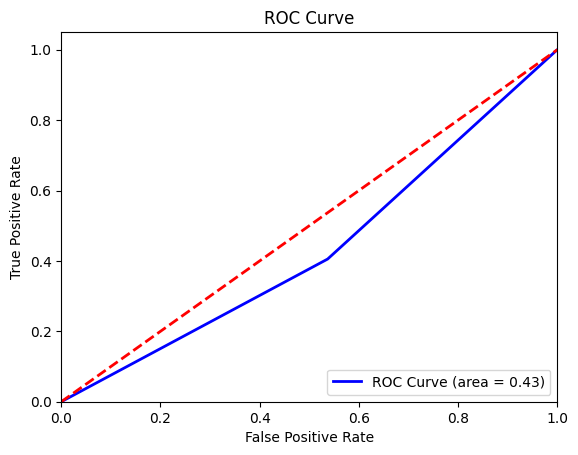

In [90]:
from sklearn.metrics import roc_curve, auc
y = relacao['obito'].replace({"nao": 0, "sim": 1})

# ROC Curve
fpr, tpr, _= roc_curve(y, modelo1.fittedvalues)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label = "ROC Curve (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1], color='red', lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()